In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

In [4]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime import QiskitRuntimeService

In [5]:
n = 10 # the length of the first register for querying the oracle 

In [21]:
oracleType, oracleValue = np.random.randint(2), np.random.randint(2)

In [22]:
if oracleType == 0:
    print("The oracle returns a constant value ", oracleValue)
else:
    print("The oracle returns a balanced function")
    a = np.random.randint(1,2**n)

The oracle returns a balanced function


In [23]:
qr = QuantumRegister(n+1)

In [24]:
cr = ClassicalRegister(n, name='res')

In [25]:
circuitName = "DeutschJozsa"
djCircuit = QuantumCircuit(qr, cr)

In [26]:
for i in range(n):
    djCircuit.h(qr[i])

In [27]:
djCircuit.x(qr[n])
djCircuit.h(qr[n])

In [28]:
djCircuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=11, num_clbits=0, params=[]), qubits=(<Qubit register=(11, "q1"), index=0>, <Qubit register=(11, "q1"), index=1>, <Qubit register=(11, "q1"), index=2>, <Qubit register=(11, "q1"), index=3>, <Qubit register=(11, "q1"), index=4>, <Qubit register=(11, "q1"), index=5>, <Qubit register=(11, "q1"), index=6>, <Qubit register=(11, "q1"), index=7>, <Qubit register=(11, "q1"), index=8>, <Qubit register=(11, "q1"), index=9>, <Qubit register=(11, "q1"), index=10>), clbits=())

In [29]:
if oracleType == 0:#If the oracleType is "0", the oracle returns oracleValue for all input. 
    if oracleValue == 1:
        djCircuit.x(qr[n])
    else:
        djCircuit.id(qr[n])
else: # Otherwise, it returns the inner product of the input with a (non-zero bitstring) 
    for i in range(n):
        if (a & (1 << i)):
            djCircuit.cx(qr[i], qr[n])

In [30]:
djCircuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=11, num_clbits=0, params=[]), qubits=(<Qubit register=(11, "q1"), index=0>, <Qubit register=(11, "q1"), index=1>, <Qubit register=(11, "q1"), index=2>, <Qubit register=(11, "q1"), index=3>, <Qubit register=(11, "q1"), index=4>, <Qubit register=(11, "q1"), index=5>, <Qubit register=(11, "q1"), index=6>, <Qubit register=(11, "q1"), index=7>, <Qubit register=(11, "q1"), index=8>, <Qubit register=(11, "q1"), index=9>, <Qubit register=(11, "q1"), index=10>), clbits=())

In [31]:
for i in range(n):
    djCircuit.h(qr[i])

In [32]:
djCircuit.barrier()
for i in range(n):
    djCircuit.measure(qr[i], cr[i])

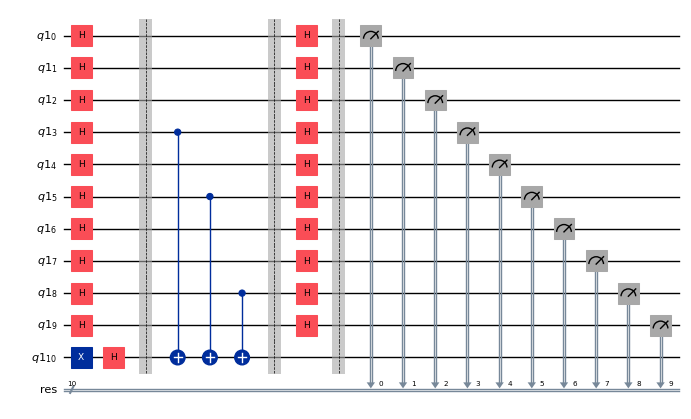

In [33]:
#draw the circuit
djCircuit.draw(output='mpl',scale=0.5)

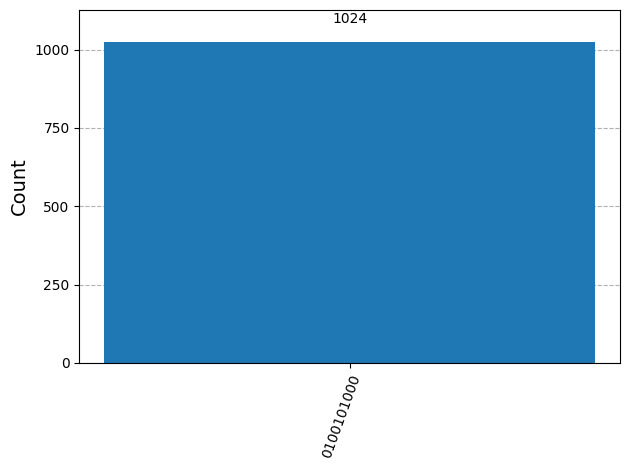

In [34]:
sampler = StatevectorSampler()
job = sampler.run([djCircuit])
results = job.result()
plot_histogram(results[0].data.res.get_counts())